In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [126]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
df.shape

(303, 14)

In [128]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

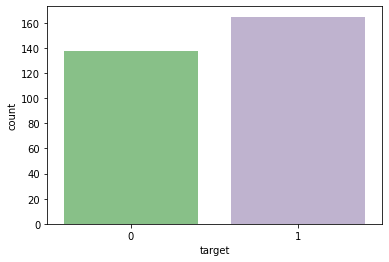

In [129]:
sns.countplot(x="target", data=df, palette="Accent")
plt.show()

In [130]:
df=pd.get_dummies(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [131]:
df.corr().head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


In [132]:
# Normalize
x = (df - np.min(df)) / (np.max(df) - np.min(df)).values

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


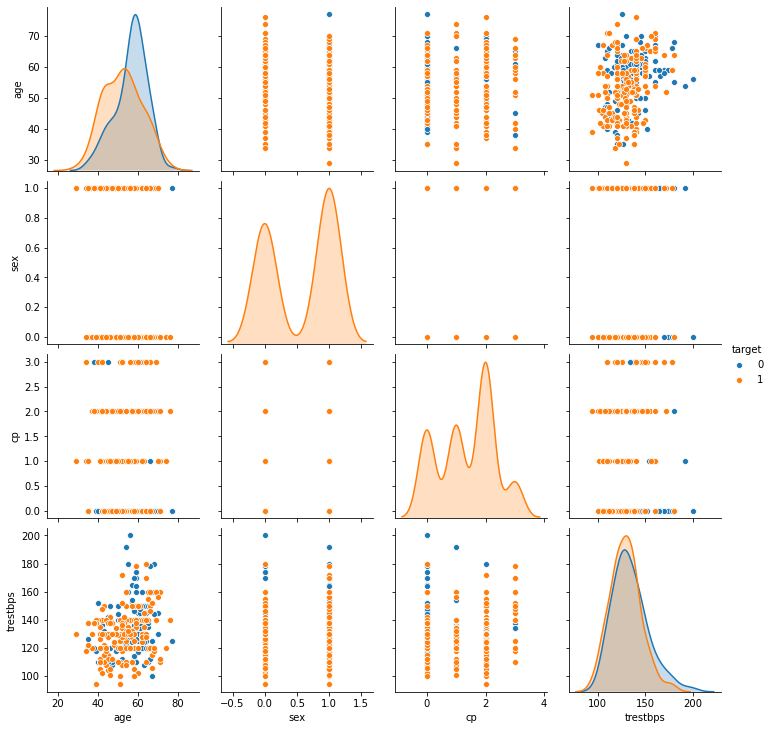

In [133]:
sns.pairplot(data=df[['age','sex','cp','trestbps','target']],hue='target')

In [134]:
train=df.drop("target",axis=1)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [135]:
target=df.target
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [173]:
#70% Training set and 30% Test Set
X_train,X_test,y_train,y_test=train_test_split(train,target,test_size=0.3,random_state=5)


In [174]:
#SVM classifier
clf=svm.SVC(kernel='linear')


In [176]:
#Train model using test set
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [177]:
y_pred=clf.predict(X_test)

In [178]:
#Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
print("Precision:",metrics.precision_score(y_test,y_pred)*100)

print("Recall:",metrics.recall_score(y_test,y_pred)*100)

Accuracy: 92.3076923076923
Precision: 90.19607843137256
Recall: 95.83333333333334


# KNN ALGORITHM

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=1)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (212, 14) (212,)
Test set: (91, 14) (91,)


In [190]:
yhat = neigh.predict(x_test)
yhat[0:3]

array([0, 1, 0], dtype=int64)

In [191]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.5377358490566038
Test set Accuracy:  0.6703296703296703


In [192]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,yhat)
cnf_matrix

array([[28, 13],
       [17, 33]], dtype=int64)

In [193]:
(28+33)/(28+33+17+13)*100

67.03296703296702